### 分類 $\rightarrow$ （狭義の）決定木 (sklearn.tree.DecisionTreeClassifier)
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#

In [ ]:
# irisデータをロード
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# データフレーム形式に変換
# カラム名を説明変数に設定
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
# ちなみにこのように書くと目的変数を一発で合体できる
iris_df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
# 1つのデータフレームに説明変数と目的変数がまとめられている時のコード例を想定
# ホールドアウト
from sklearn.model_selection import train_test_split

features = iris_df.loc[:, iris.feature_names]
label = iris_df["species"]
df_train, df_test, label_train, label_test = train_test_split(features, label)

In [ ]:
# 決定木を実行
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(df_train, label_train)

print("予測精度\t : ", dtc.score(df_test, label_test))

予測精度	 :  0.9210526315789473


In [33]:
## 結果を可視化
# 決定木モデルをDOTデータという規格に変換
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,
                           filled=True,
                           rounded=True,
                           feature_names=features.columns,
                           class_names=iris.target_names,
                           special_characters=True)

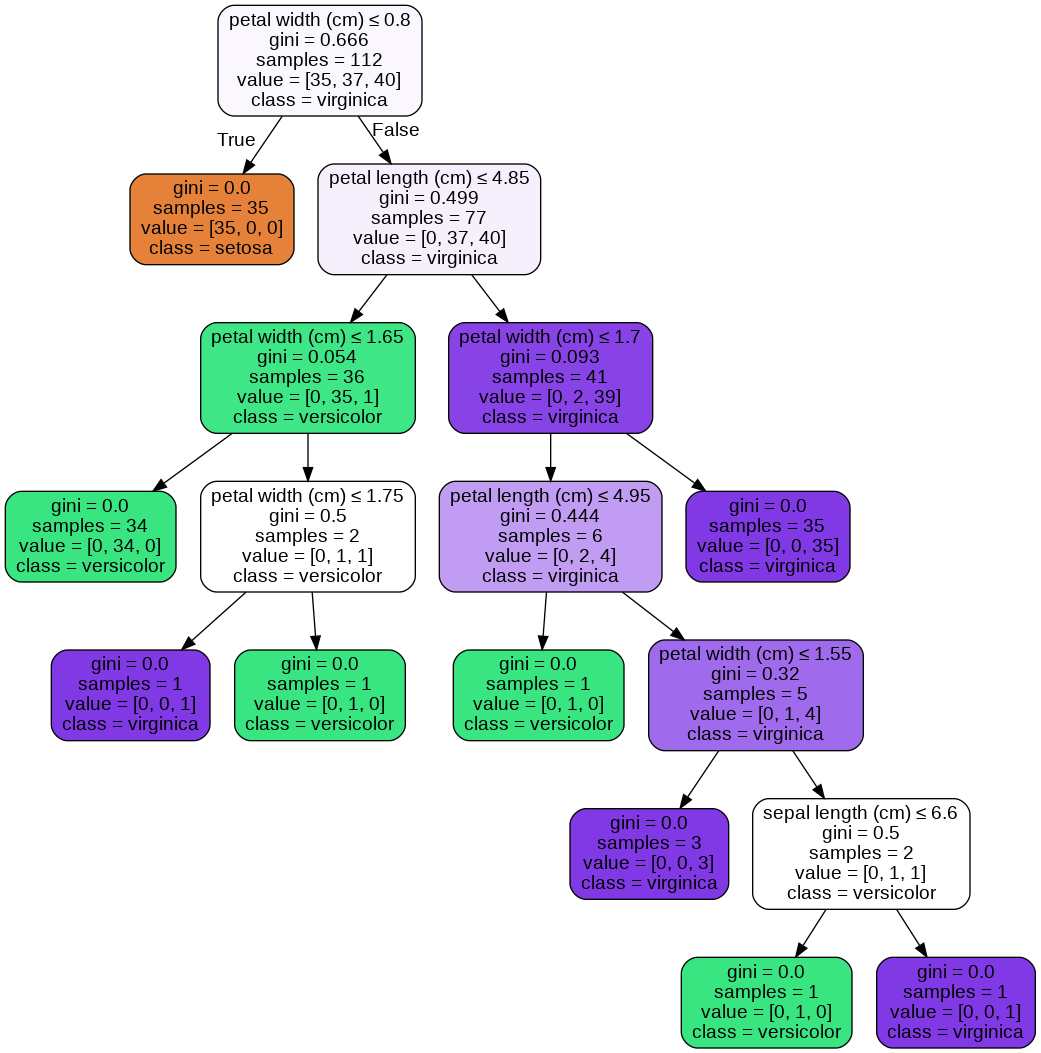

In [34]:
# DOTデータを描画するライブラリ
import pydotplus as pdp

# ダイアグラムを描画
graph = pdp.graph_from_dot_data(dot_data)

'''# 画像ファイルとして出力（保存）する場合
file_name = "/content/tree_visualization.png"
graph.write_pdf(file_name)
'''

# 画面（コンソール）にダイアグラムを表示
from IPython.display import Image
Image(graph.create_png())